In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms.distance_measures import eccentricity
import scipy.stats as ss

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df

,Nombre,Compositor,Artista/Banda,URL,Año
0,"Tú, sólo tú",Felipe Valdés Leal,Pedro Infante,https://www.letras.com/pedro-infante/1845576/,1950
1,La múcura,Antonio Fuentes,Los Panchos,https://www.letras.com/trio-los-panchos/872309/,1950
2,Pobre corazón,Chucho Monge,Pedro Infante,https://www.cancioneros.com/letras/cancion/187...,1950
3,Qué rico mambo,Dámaso Pérez Prado,Dámaso Pérez Prado,https://genius.com/Perez-prado-que-rico-el-mam...,1950
4,Viajera,Luis Arcaraz,Luis Arcaraz,https://www.musica.com/letras.asp?letra=1058022,1950
...,...,...,...,...,...
624,Dime Cómo Quieres,NaN,Christian Nodal featuring Ángela Aguilar\t,https://www.letras.com/christian-nodal/dime-co...,2021
625,Mi niña,NaN,Wisin featuring Mike Towers\t,https://www.letras.com/wisin/mi-nina-remix-par...,2021
626,Dime Cómo Quieres,NaN,Christian Nodal featuring Ángela Aguilar\t,https://www.letras.com/christian-nodal/dime-co...,2021
627,Tan enamorados,NaN,CNCO\t,https://www.letras.com/cnco/tan-enamorados/,2021


In [5]:
df = df.rename(columns={'Artista/Banda': 'Artists'})

In [6]:
df.columns

Index(['Nombre', 'Compositor', 'Artists', 'URL', 'Año'], dtype='object')

In [7]:
df.drop(['Nombre', 'Compositor', 'URL'], axis=1, inplace=True)

In [8]:
df

,Artists,Año
0,Pedro Infante,1950
1,Los Panchos,1950
2,Pedro Infante,1950
3,Dámaso Pérez Prado,1950
4,Luis Arcaraz,1950
...,...,...
624,Christian Nodal featuring Ángela Aguilar\t,2021
625,Wisin featuring Mike Towers\t,2021
626,Christian Nodal featuring Ángela Aguilar\t,2021
627,CNCO\t,2021


In [9]:
artistas = list(df.Artists.unique())
#artistas

In [10]:
years = list(df.Año.unique())
#years

In [11]:
cuenta = df.apply(tuple, axis=1).value_counts()
edges = cuenta.to_dict()
#edges

In [12]:
G = nx.Graph()

In [13]:
for index, df in df.iterrows():
    G.add_edge(df['Artists'], df['Año'])

In [14]:
conectCA = list(nx.connected_components(G))
stronglyCA = max(conectCA, key=len)
CAN = G.subgraph(stronglyCA )

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


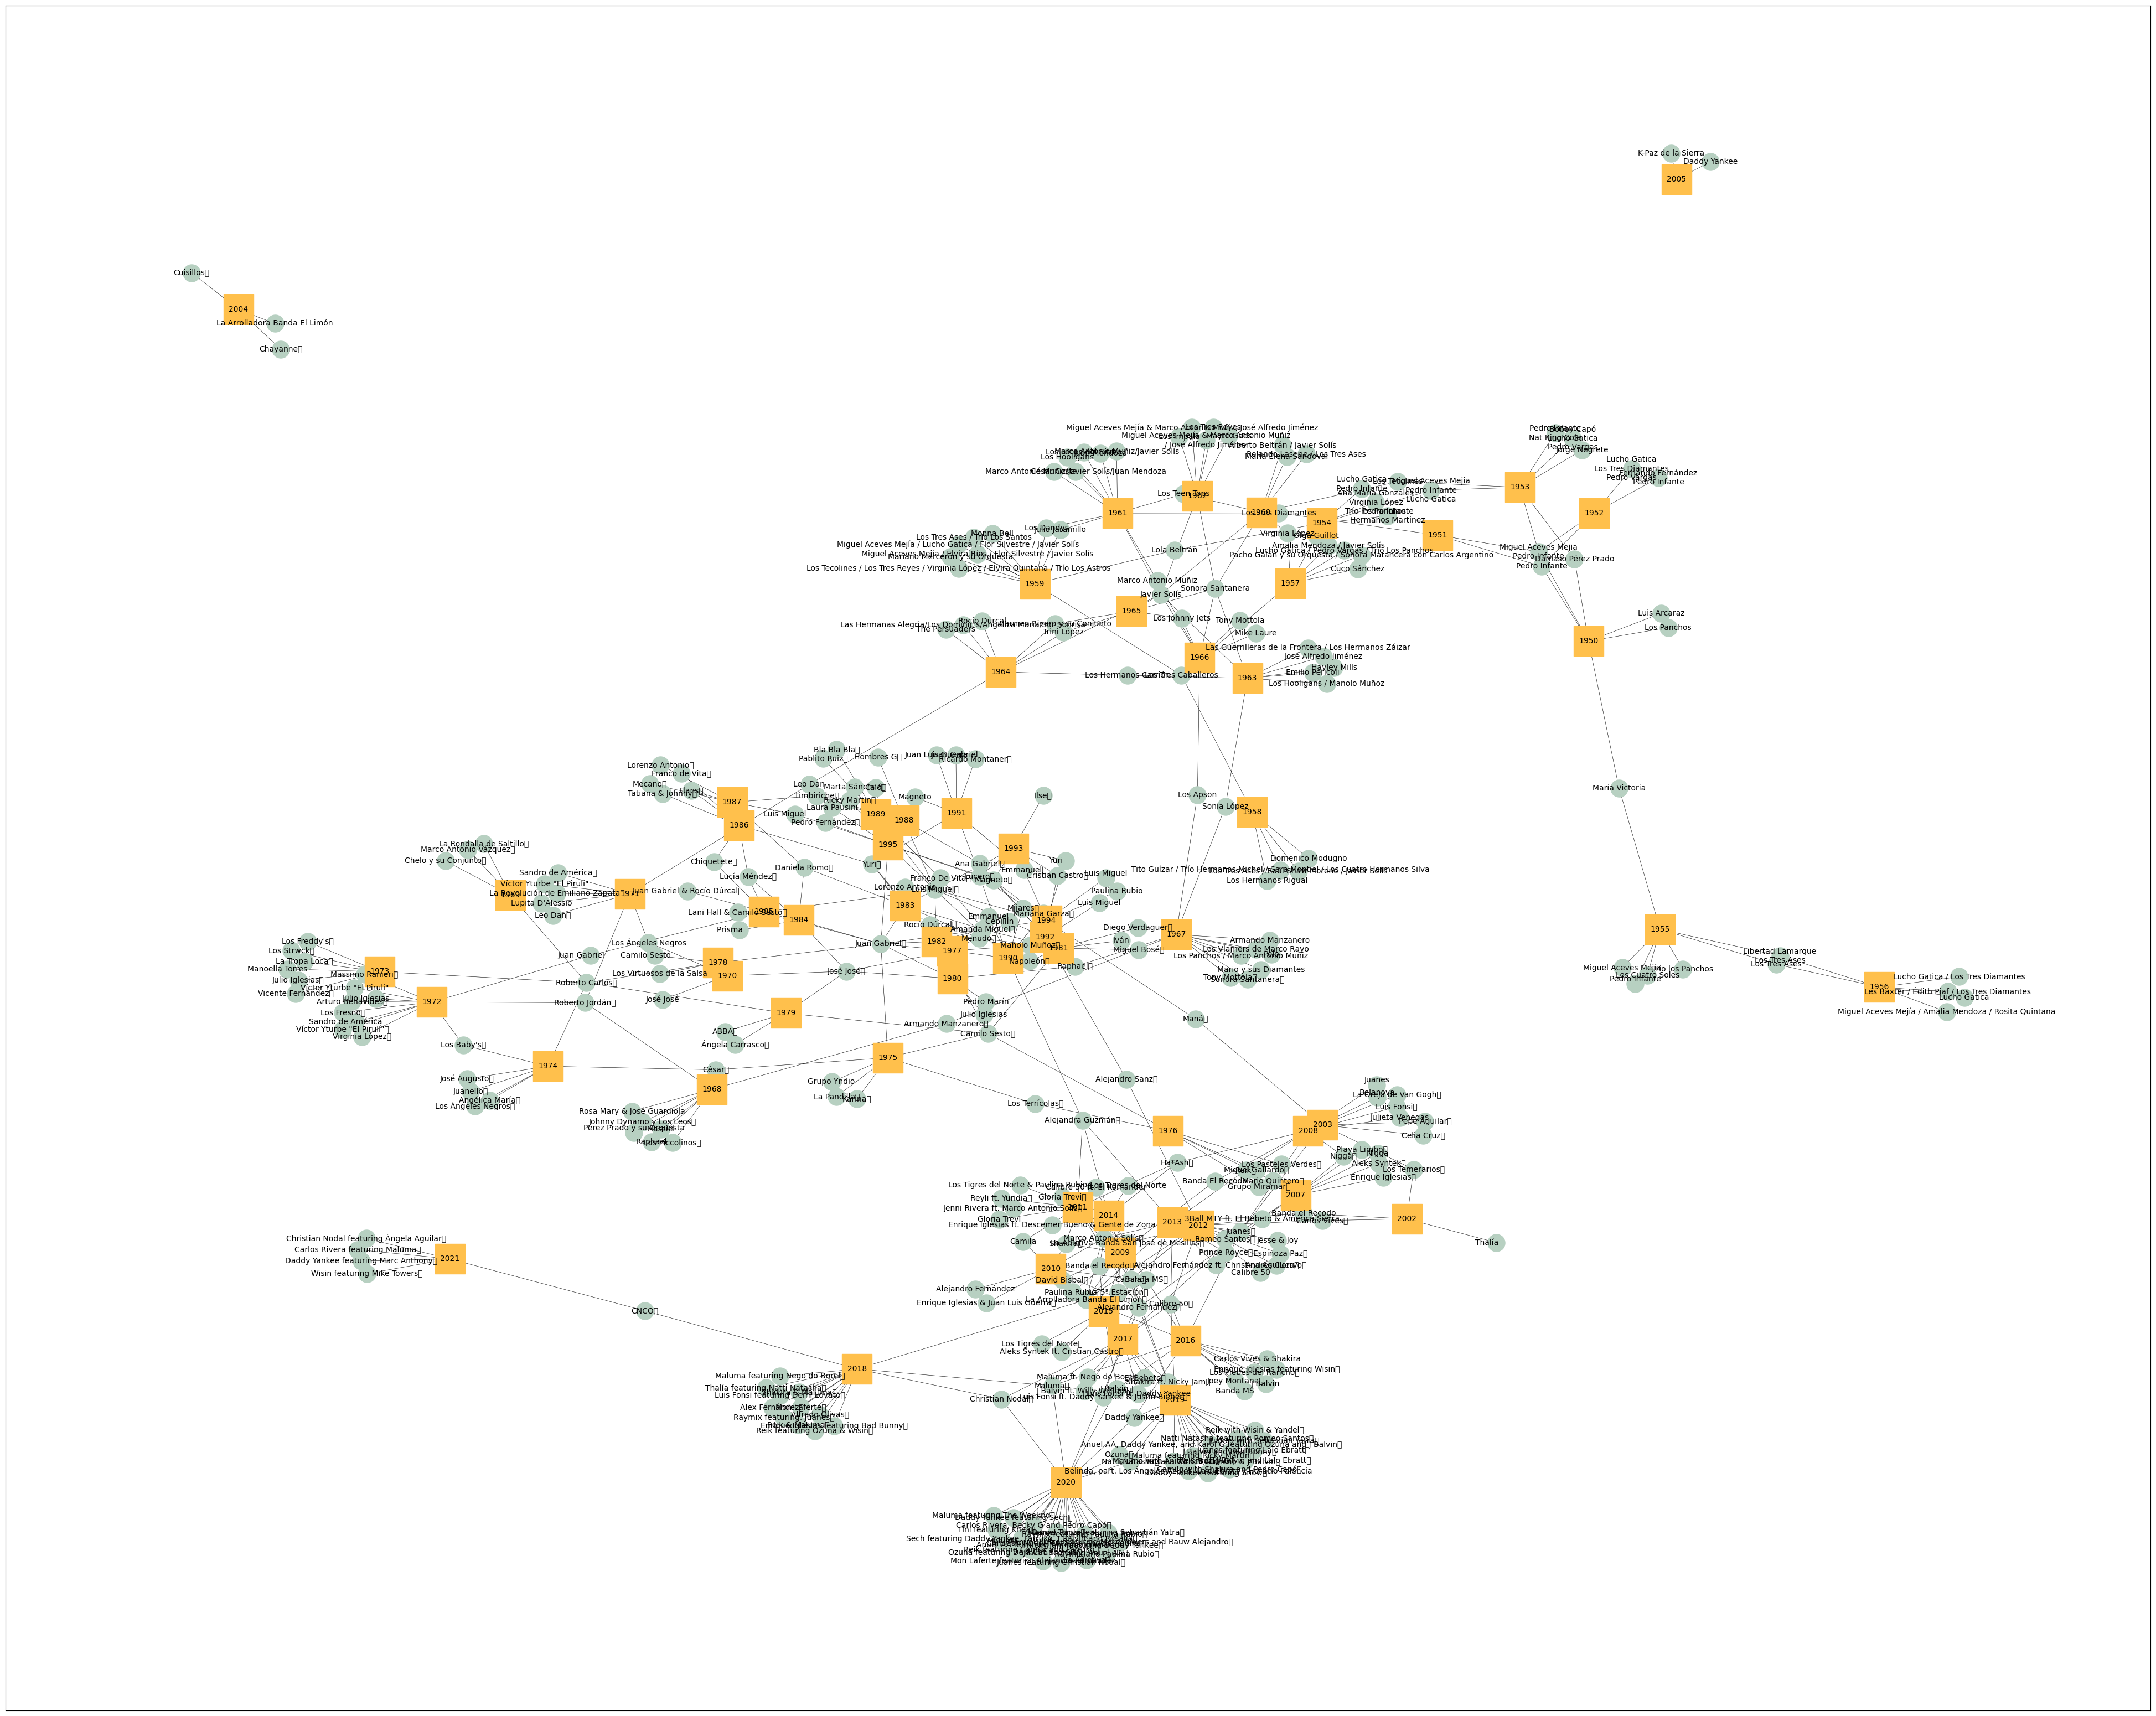

In [15]:
plt.rcParams["figure.figsize"] = (50, 40)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=artistas, node_size=500, node_color='#b7d0c1')
nx.draw_networkx_nodes(G, pos, nodelist=years, node_size=1500, node_color='#ffc04c', node_shape='s')
nx.draw_networkx_edges(G,pos, width = 0.4, edge_color='black')
nx.draw_networkx_labels(G,pos , font_size=10)
plt.show()

### Propiedades Generales

In [16]:
print('El tamaño de la red es: ', G.size())
print('La cantidad de nodos de la red es: ', G.order())
print('La cantidad de aristas de la red es:', len(G.edges()))
print('La cantidad de componentes conexas: ', len(list(nx.connected_components(G))))

El tamaño de la red es:  505
La cantidad de nodos de la red es:  391
La cantidad de aristas de la red es: 505
La cantidad de componentes conexas:  3


### Centralidades

In [17]:
grado = nx.degree_centrality(G)
intermediacion = nx.betweenness_centrality(G)
cercania = nx.closeness_centrality(G)
excentricidad = nx.eccentricity(CAN)
cercaniaK = nx.katz_centrality(G)

#### Top 5 de centralidades de grado

In [18]:
grado_sorted = list(sorted(grado.items(), key=lambda item:item[1], reverse=True))
grado_sorted[0:5]

[(2020, 0.06923076923076923),
 (2019, 0.05641025641025641),
 (2018, 0.038461538461538464),
 (2016, 0.03333333333333333),
 (1961, 0.03076923076923077)]

#### Top 5 de centralidades de intermediación

In [19]:
inter_sorted = list(sorted(intermediacion.items(), key=lambda item:item[1], reverse=True))
inter_sorted[0:5]

[('Juan Gabriel\t', 0.4044553412610729),
 (1967, 0.3298192736537483),
 (1980, 0.32326521678100434),
 ('Raphael\t', 0.3096395397636601),
 ('Luis Miguel\t', 0.2852211021213675)]

#### Top 5 de centralidades de cercanía


In [20]:
cercania_sorted = list(sorted(cercania.items(), key=lambda item:item[1], reverse=True))
cercania_sorted[0:5]

[('Juan Gabriel\t', 0.1602580490096468),
 (1994, 0.15717745132705432),
 ('Luis Miguel\t', 0.15704619667041378),
 (1985, 0.1558746958249652),
 (1982, 0.15408670259141377)]

#### Top 5 utilizando PageRank

In [21]:
pageR = nx.pagerank(G, alpha=0.9)
pageR_sorted = list(sorted(pageR.items(), key=lambda item:item[1], reverse=True))
pageR_sorted[0:5]

[(2020, 0.02656531708013413),
 (2019, 0.019826993821230116),
 (2018, 0.015303204387396109),
 (1972, 0.01179428241745801),
 (1967, 0.011694881377899393)]

Text(0.5, 1.0, 'Katz')

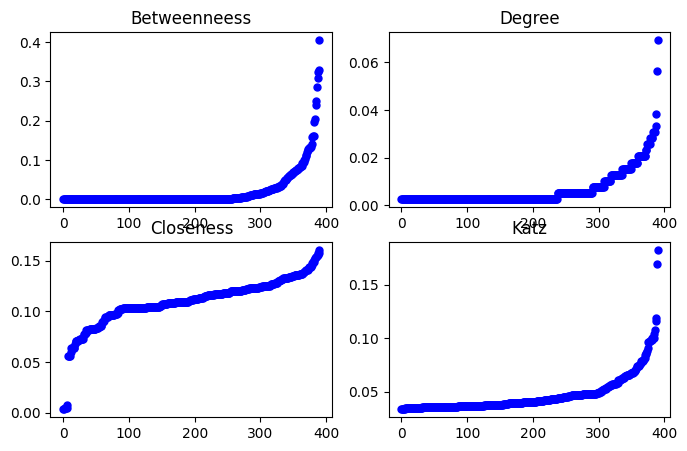

In [22]:
plt.rcParams["figure.figsize"] = (8, 5)
plt.subplot(2,2,1)
plt.plot(sorted(intermediacion.values()), '.b', markersize=10)
plt.title('Betweenneess')

plt.subplot(2,2,2)
plt.plot(sorted(grado.values()), '.b', markersize=10)
plt.title('Degree')

plt.subplot(2,2,3)
plt.plot(sorted(cercania.values()), '.b', markersize=10)
plt.title('Closeness')

plt.subplot(2,2,4)
plt.plot(sorted(cercaniaK.values()), '.b', markersize=10)
plt.title('Katz')

#### K-Núcleos

In [23]:
def degeneracy(G):
  d = max(nx.core_number(G).values())
  return d

In [24]:
degeneracy(G)

3

In [25]:
E_deg = [d for nodo, d in nx.degree(G)]
E_core = nx.core_number(G).values()
ss.spearmanr(E_deg, list(E_core))

SignificanceResult(statistic=0.942479153237949, pvalue=3.188623529697995e-187)

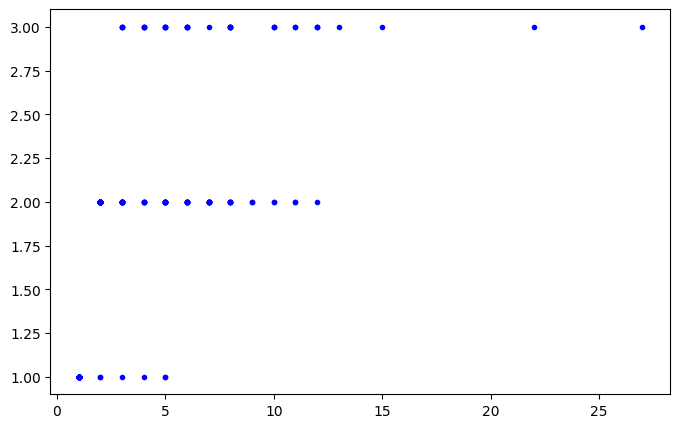

In [26]:
plt.plot(E_deg, E_core, '.b')

### Redes de la vida Real

In [27]:
G.order(), G.size()

(391, 505)

In [28]:
# estimación de probabilidad de conexión.
505/(391*390/2)

0.006623385140009181

In [29]:
Gr = nx.erdos_renyi_graph(391, 0.006623385140009181)

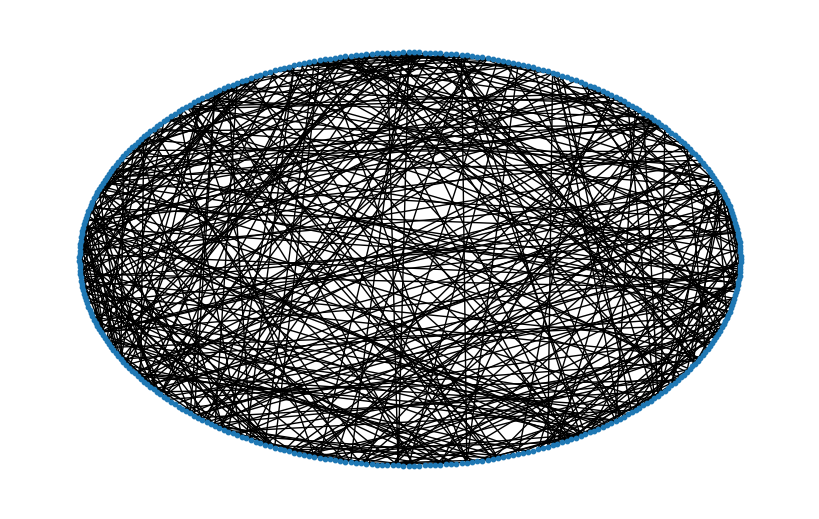

In [30]:
nx.draw_circular(Gr, node_size=10)

#### Diámetro

In [31]:
conectCA = list(nx.connected_components(Gr))
stronglyCA = max(conectCA, key=len)
CAN_= Gr.subgraph(stronglyCA )

In [32]:
nx.diameter(CAN), nx.diameter(CAN_)

(26, 17)

#### Longitud promedio de la ruta más corta




In [33]:
nx.average_shortest_path_length(CAN), nx.average_shortest_path_length(CAN_)

(9.16676185813751, 6.567241940735917)

#### Coeficiente de Clustering

In [34]:
nx.average_clustering(CAN), nx.average_shortest_path_length(CAN_)

(0.0, 6.567241940735917)